<a href="https://colab.research.google.com/github/thesighsrikar/DL1_Pokedex/blob/master/Pokedex_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_28.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_11.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_18.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_13.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_3.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_47.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_30.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_29.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_39.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_7.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_21.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_31.jpg
/kaggle/input/complete-pokemon-image-dataset/pokemon/Ariados/Ariados_41.jpg
/kaggle/input/

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.widgets import *
import numpy as np

In [0]:
path = '../input/complete-pokemon-image-dataset/pokemon'

In [0]:
np.random.seed(42)
data = (ImageList.from_folder(path).split_by_rand_pct()
        .label_from_folder().transform(get_transforms(), size=128).databunch().normalize(imagenet_stats))

In [0]:
data.classes

['Abomasnow',
 'Abomasnow(Mega)',
 'Abra',
 'Absol',
 'Absol(Mega)',
 'Accelgor',
 'Aegislash',
 'Aerodactyl',
 'Aerodactyl(Mega)',
 'Aggron',
 'Aggron(Mega)',
 'Aipom',
 'Alakazam',
 'Alakazam(Mega)',
 'Alomomola',
 'Altaria',
 'Altaria(Mega)',
 'Amaura',
 'Ambipom',
 'Amoonguss',
 'Ampharos',
 'Ampharos(Mega)',
 'Anorith',
 'Araquanid',
 'Arbok',
 'Arcanine',
 'Arceus',
 'Archen',
 'Archeops',
 'Ariados',
 'Armaldo',
 'Aromatisse',
 'Aron',
 'Articuno',
 'Audino',
 'Audino(Mega)',
 'Aurorus',
 'Avalugg',
 'Axew',
 'Azelf',
 'Azumarill',
 'Azurill',
 'Bagon',
 'Baltoy',
 'Banette',
 'Banette(Mega)',
 'Barbaracle',
 'Barboach',
 'Basculin(Blue-Striped)',
 'Basculin(Red-Striped)',
 'Bastiodon',
 'Bayleef',
 'Beartic',
 'Beautifly',
 'Beedrill',
 'Beedrill(Mega)',
 'Beheeyem',
 'Beldum',
 'Bellossom',
 'Bellsprout',
 'Bergmite',
 'Bewear',
 'Bibarel',
 'Bidoof',
 'Binacle',
 'Bisharp',
 'Blacephalon',
 'Blastoise',
 'Blastoise(Mega)',
 'Blaziken',
 'Blaziken(Mega)',
 'Blissey',
 'Blitzle

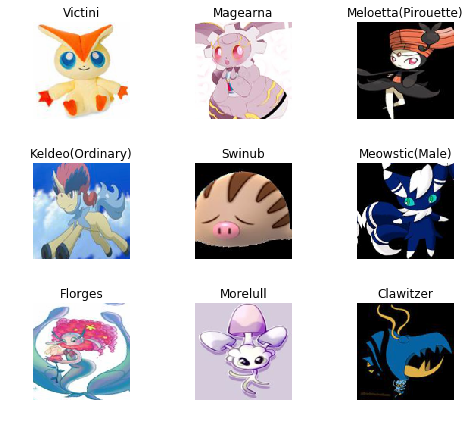

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Abomasnow',
  'Abomasnow(Mega)',
  'Abra',
  'Absol',
  'Absol(Mega)',
  'Accelgor',
  'Aegislash',
  'Aerodactyl',
  'Aerodactyl(Mega)',
  'Aggron',
  'Aggron(Mega)',
  'Aipom',
  'Alakazam',
  'Alakazam(Mega)',
  'Alomomola',
  'Altaria',
  'Altaria(Mega)',
  'Amaura',
  'Ambipom',
  'Amoonguss',
  'Ampharos',
  'Ampharos(Mega)',
  'Anorith',
  'Araquanid',
  'Arbok',
  'Arcanine',
  'Arceus',
  'Archen',
  'Archeops',
  'Ariados',
  'Armaldo',
  'Aromatisse',
  'Aron',
  'Articuno',
  'Audino',
  'Audino(Mega)',
  'Aurorus',
  'Avalugg',
  'Axew',
  'Azelf',
  'Azumarill',
  'Azurill',
  'Bagon',
  'Baltoy',
  'Banette',
  'Banette(Mega)',
  'Barbaracle',
  'Barboach',
  'Basculin(Blue-Striped)',
  'Basculin(Red-Striped)',
  'Bastiodon',
  'Bayleef',
  'Beartic',
  'Beautifly',
  'Beedrill',
  'Beedrill(Mega)',
  'Beheeyem',
  'Beldum',
  'Bellossom',
  'Bellsprout',
  'Bergmite',
  'Bewear',
  'Bibarel',
  'Bidoof',
  'Binacle',
  'Bisharp',
  'Blacephalon',
  'Blastoise',
  'Bl

In [0]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /tmp/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [00:01<00:00, 107MB/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,5.422278,3.852888,0.287076,01:56
1,2.749542,1.896505,0.588760,01:38
2,1.638770,1.343419,0.702982,01:36
3,1.038660,1.251894,0.729357,01:35


In [0]:
learn.save('Pokemons_Resnet101_stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


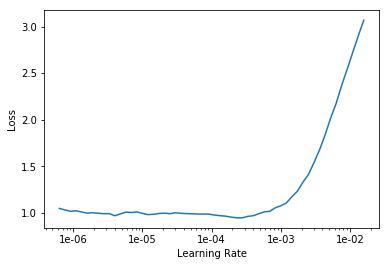

In [0]:
learn.recorder.plot()

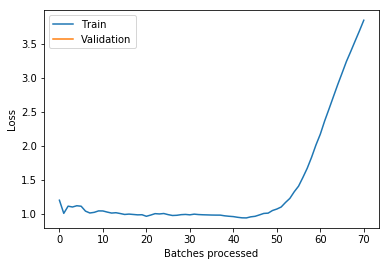

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.938502,1.155282,0.746399,01:44
1,0.852993,1.029686,0.770947,01:42
2,0.615796,0.936315,0.791236,01:42
3,0.469347,0.883526,0.801582,01:43
4,0.386526,0.876942,0.803003,01:42


In [0]:
learn.save('Pokemons_Resnet101_stage-2')

In [0]:
data = ImageDataBunch.from_folder(path, train=".", 
                                  valid_pct=0.2,
                                  ds_tfms=get_transforms(flip_vert=False),
                                  size=128,bs=64, 
                                  num_workers=0).normalize(imagenet_stats)

In [0]:
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

In [0]:
learn.freeze()

In [0]:
learn.fit_one_cycle(5, slice(1e-6))

epoch,train_loss,valid_loss,accuracy,time
0,0.575357,0.243551,0.951106,03:21
1,0.577979,0.244399,0.949888,03:09
2,0.606734,0.242383,0.950294,03:01
3,0.578771,0.243703,0.950903,02:55
4,0.579772,0.242470,0.952120,02:37


In [0]:
learn.save('Pokemon_Resnet101_stage-3')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


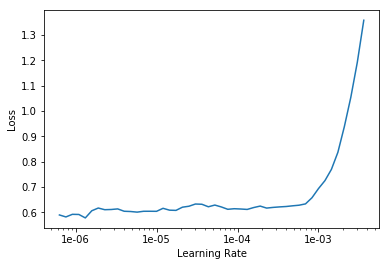

In [0]:
learn.recorder.plot()

learn.recorder.plot_losses()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused()

[('Scizor', 'Scizor(Mega)', 2),
 ('Servine', 'Snivy', 2),
 ('Abomasnow', 'Dewgong', 1),
 ('Absol(Mega)', 'Zangoose', 1),
 ('Accelgor', 'Hitmonlee', 1),
 ('Aerodactyl', 'Haunter', 1),
 ('Aggron', 'Houndoom(Mega)', 1),
 ('Aggron', 'Regirock', 1),
 ('Altaria', 'Absol(Mega)', 1),
 ('Amoonguss', 'Foongus', 1),
 ('Ampharos', 'Medicham', 1),
 ('Ampharos(Mega)', 'Ampharos', 1),
 ('Avalugg', 'Regice', 1),
 ('Banette', 'Diancie', 1),
 ('Beartic', 'Altaria(Mega)', 1),
 ('Beartic', 'Articuno', 1),
 ('Beedrill', 'Scyther', 1),
 ('Beheeyem', 'Avalugg', 1),
 ('Bellsprout', 'Budew', 1),
 ('Bellsprout', 'Chespin', 1),
 ('Bidoof', 'Bibarel', 1),
 ('Blacephalon', 'Rattata(Alolan)', 1),
 ('Blastoise(Mega)', 'Blastoise', 1),
 ('Blissey', 'Swirlix', 1),
 ('Braviary', 'Houndoom(Mega)', 1),
 ('Bruxish', 'Comfey', 1),
 ('Camerupt', 'Camerupt(Mega)', 1),
 ('Castform(Snowy)', 'Suicune', 1),
 ('Chandelure', 'Doublade', 1),
 ('Charizard(Mega X)', 'Swampert(Mega)', 1),
 ('Charmeleon', 'Bruxish', 1),
 ('Chesnaught',

In [0]:
learn.load('Pokemon_Resnet101_stage-3')

Learner(data=ImageDataBunch;

Train: LabelList (19717 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Ariados,Ariados,Ariados,Ariados,Ariados
Path: ../input/complete-pokemon-image-dataset/pokemon;

Valid: LabelList (4929 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
Sceptile,Xatu,Binacle,Tyrantrum,Armaldo
Path: ../input/complete-pokemon-image-dataset/pokemon;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [0]:
learn.export('/tmp/model/pokemon.pkl')

In [0]:
defaults.device = torch.device('cpu')

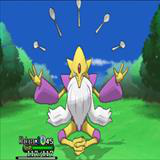

In [0]:
img1 = open_image('../input/complete-pokemon-image-dataset/pokemon/Alakazam(Mega)/Alakazam(Mega)_20.jpg')
img1

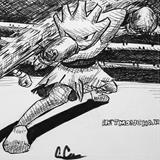

In [0]:
img2 = open_image('../input/complete-pokemon-image-dataset/pokemon/Hitmonchan/Hitmonchan_27.jpg')
img2

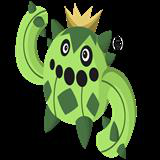

In [0]:
img3 = open_image('../input/complete-pokemon-image-dataset/pokemon/Cacnea/Cacnea_8.jpg')
img3

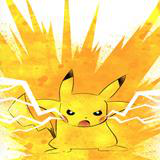

In [0]:
img4 = open_image('../input/complete-pokemon-image-dataset/pokemon/Pikachu/Pikachu_5.jpg')
img4

In [0]:
pred_class,pred_idx,outputs = learn.predict(img1)
pred_class

Category Alakazam(Mega)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img2)
pred_class

Category Hitmonchan

In [0]:
pred_class,pred_idx,outputs = learn.predict(img3)
pred_class

Category Cacnea

In [0]:
pred_class,pred_idx,outputs = learn.predict(img4)
pred_class

Category Pikachu